### <span style="color:red">Lorenzo Albano, 967738</span>

# <span style="color:red"> ESERCIZI 4.1 e 4.2:</span> Molecular Dinamycs NVE: fase solida, liquida e gassosa

Si studia la dinamica di un sistema classico di $N$ molecole che interagiscono tramite un potenziale adiabatico di Lennard-Jones:
$$V_{LJ}(r)=4\varepsilon \left[ \left(\frac{\sigma}{r}\right)^{12}-\left(\frac{\sigma}{r}\right)^{6} \right]$$

Per l'esercizio 4.1 è stata aggiunta al codice fornito di Molecular Dinamycs la pressione $P$ del sistema, ottenibile attraverso la formula 
$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

Nell'esercizio 4.2 è stato testato il codice realizzato, compiendo una simulazione di $N$ molecole di Argon ($N=108$), ponendo i  parametri del potenziale adiabatico pari a
$$\sigma = 0.34 \hbox{ nm}\hspace{2cm}\epsilon/k_B = 120 \hbox{ K}\hspace{2cm} m=39.948 \hbox{ amu}$$

Mentre la densità $\rho^\star$ (in unità di LJ), la temperatura $T^\star$ (in unità di LJ) ed il raggio di cut-off dell'interazione $r_c$ (in unità di $\sigma$) nelle tre fasi della materia sono state fissate come di seguito:
1. fase solida: $\hspace{1.7cm}\rho^\star = 1.1\hspace{1.2cm} T^\star = 0.8\hspace{1cm} r_c = 2.2$
2. fase liquida: $\hspace{1.6cm}\rho^\star = 0.8\hspace{1.2cm} T^\star = 1.1\hspace{1cm} r_c = 2.5$
3. fase gassosa: $\hspace{1.25cm}\rho^\star = 0.05\hspace{1cm} T^\star = 1.2\hspace{1cm} r_c = 5.0$


Il sistema viene creato con molecole in un reticolo cristallino: se si procedesse ponendo le molecole in posizioni pseudo-casuali si rischierebbe di ottenere sovrapposizioni di particelle che comporterebbero delle divergenze non-fisiche. Le velocità iniziali delle N molecole sono invece distribuite normalmente attorno ad un valore medio compatibile con la temperatura iniziale. Le condizioni al contorno sono periodiche ("reticolo infinito").

NVE significa che il numero di particelle $N$, il volume $V$ e l'energia $E$ del sistema sono costanti.
#### Processo di equilibrazione
A causa della bassa entropia della configurazione di partenza (molecole in un reticolo cristallino, "basso disordine"), è necessario fornire in input un valore di temperatura maggiore (per la fase solida e liquida, rispettivamente $T_{solida\;i}^\star=1.543$, $T_{liquida\;i}^\star=1.979$) o minore (per la fase gassosa, $T_{gassosa\;i}^\star=0.948$) e aspettare che il sistema si assesti - alla temperature richieste sopra - prima di poter misurare le osservabili. Infatti, l'algoritmo di integrazione di Verlet usato per muovere il sistema conserva l'energia totale: di conseguenza, a seconda che la configurazione cristallina iniziale abbia energia potenziale maggiore/minore rispetto al valore che ha all'equilibrio, essa tenderà a diminuire/aumentare portando quindi l'energia cinetica ad aumentare/diminuire e con essa la temperatura.

#### Evoluzione, simulazione e grafici
Il sistema evolve nel tempo calcolando le forze che agiscono su ogni particella entro il raggio di cut-off $r_c$ e aggiornando individualmente la loro posizione. Il processo viene ripetuto 2000 volte per blocco (20000 volte per il gas), durante le quali vengono compiute altrettante misure delle sopracitate grandezze termodinamiche al fine di calcolare i loro valori medi e le incertezze progressive in funzione del numero di blocchi sommati (metodo a blocchi, usa deviazione standard della media per l'incertezza statistica). Vengono quindi rappresentati nei grafici seguenti, in funzione dell'aumentare di blocchi sommati, i valori medi delle seguenti osservabili (unità di misura LJ):
   1. Temperatura $T^\star$  
   2. Pressione $P^\star$ 
   3. Energia totale per molecola $E^\star$ 
   4. Energia potenziale per molecola $U^\star$ 
   5. Energia cinetica per molecola $K^\star$ 

## <span style="color:blue"> GRAFICO A) </span> Temperatura

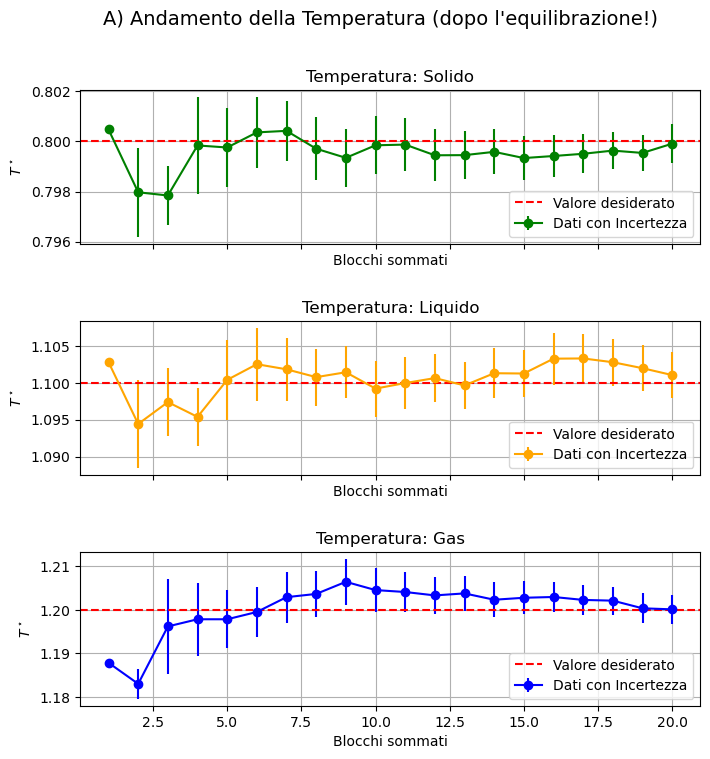

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Leggi i dati dal file
data = np.loadtxt("output_temp.dat", usecols=(0, 2, 3))

# Crea il grafico
fig, axs = plt.subplots(3, 1, sharex=True, sharey=False, figsize=(8, 8))
plt.suptitle("A) Andamento della Temperatura (dopo l'equilibrazione!)", fontsize=14)

# Primo subplot
axs[0].set_title('Temperatura: Solido')
axs[0].errorbar(data[:20, 0], data[:20, 1], yerr=data[:20, 2], fmt='-o', color='green', label='Dati con Incertezza')
axs[0].set_xlabel("Blocchi sommati")
axs[0].set_ylabel(r"$T^\star$")
axs[0].axhline(y=0.8, color='r', linestyle='--', label="Valore desiderato")
axs[0].legend()

# Secondo subplot
axs[1].set_title('Temperatura: Liquido')
axs[1].errorbar(data[20:40, 0], data[20:40, 1], yerr=data[20:40, 2], fmt='-o', color='orange', label='Dati con Incertezza')
axs[1].set_xlabel("Blocchi sommati")
axs[1].set_ylabel(r"$T^\star$")
axs[1].axhline(y=1.1, color='r', linestyle='--', label="Valore desiderato")
axs[1].legend()

# Terzo subplot
axs[2].set_title('Temperatura: Gas')
axs[2].errorbar(data[40:60, 0], data[40:60, 1], yerr=data[40:60, 2], fmt='-o', color='blue', label='Dati con Incertezza')
axs[2].set_xlabel("Blocchi sommati")
axs[2].set_ylabel(r"$T^\star$")
axs[2].axhline(y=1.2, color='r', linestyle='--', label="Valore desiderato")
axs[2].legend()

# Aggiunge la griglia
for ax in axs:
    ax.grid(True)

# Distanziamento tra i subplot
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Mostra il grafico
plt.show()

## <span style="color:green"> GRAFICO B) </span> Pressione

<IPython.core.display.Javascript object>


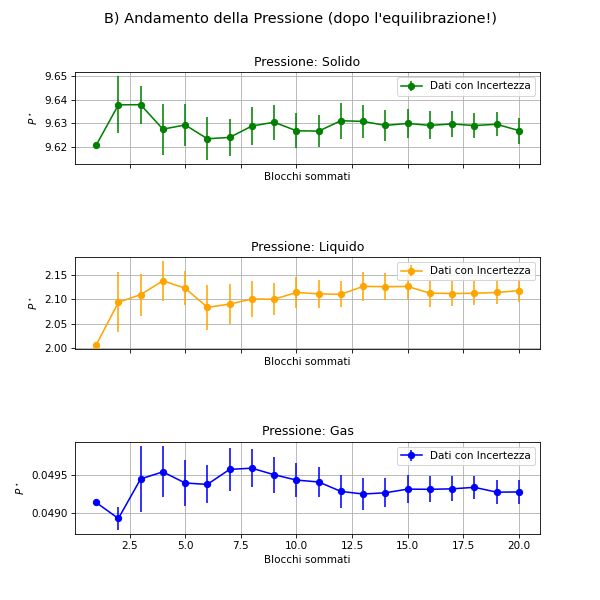

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Leggi i dati dal file
data = np.loadtxt("output_press.dat", usecols=(0,2,3))

# Crea il grafico
fig, axs = plt.subplots(3,1, sharex=True, sharey=False, figsize=(8, 8))
plt.suptitle("B) Andamento della Pressione (dopo l'equilibrazione!)", fontsize=14)

# Primo subplot
axs[0].set_title('Pressione: Solido')
axs[0].errorbar(data[:20,0], data[:20,1], yerr=data[:20,2], fmt='-o', color = 'green', label='Dati con Incertezza')
axs[0].set_xlabel("Blocchi sommati")
axs[0].set_ylabel(r"$P^\star$")
#axs[0].set_ylim(0.79, 0.81)
axs[0].legend()

# Secondo subplot
axs[1].set_title('Pressione: Liquido')
axs[1].errorbar(data[20:40,0], data[20:40,1], yerr=data[20:40,2], fmt='-o', color = 'orange', label='Dati con Incertezza')
axs[1].set_xlabel("Blocchi sommati")
axs[1].set_ylabel(r"$P^\star$")
#axs[1].set_ylim(1.09, 1.11)
axs[1].legend()

# Terzo subplot
axs[2].set_title('Pressione: Gas')
axs[2].errorbar(data[40:60,0], data[40:60,1], yerr=data[40:60,2], fmt='-o', color = 'blue', label='Dati con Incertezza')
axs[2].set_xlabel("Blocchi sommati")
axs[2].set_ylabel(r"$P^\star$")
#axs[2].set_ylim(1.18, 1.23)
axs[2].legend()

# Aggiunge la griglia
for ax in axs:
    ax.grid(True)
    
#distanziamento
plt.subplots_adjust(wspace=0.5, hspace=1)

# Mostra il grafico
plt.show()

## <span style="color:orange"> GRAFICO C) </span> Energia totale per molecola

<IPython.core.display.Javascript object>


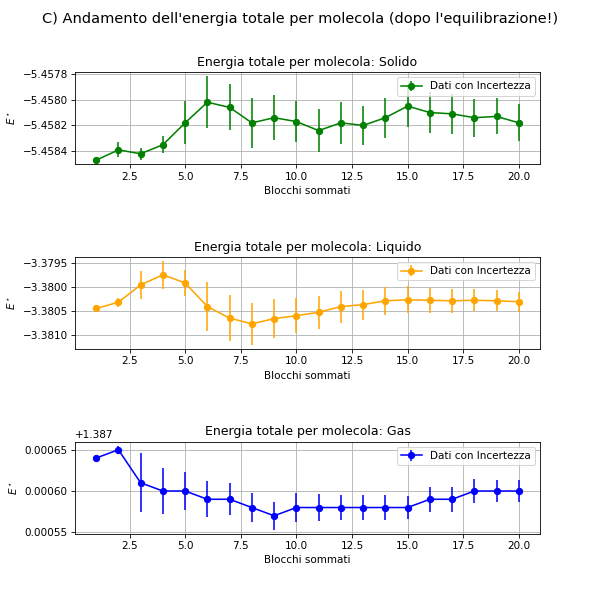

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Leggi i dati dal file
data = np.loadtxt("output_etot.dat", usecols=(0,2,3))

# Crea il grafico
fig, axs = plt.subplots(3,1, sharex=False, sharey=False, figsize=(8, 8))
plt.suptitle("C) Andamento dell'energia totale per molecola (dopo l'equilibrazione!)", fontsize=14)

# Primo subplot
axs[0].set_title('Energia totale per molecola: Solido')
axs[0].errorbar(data[:20,0], data[:20,1], yerr=data[:20,2], fmt='-o', color = 'green', label='Dati con Incertezza')
axs[0].set_xlabel("Blocchi sommati")
axs[0].set_ylabel(r"$E^\star$")
#axs[0].set_ylim(0.79, 0.81)
axs[0].legend()

# Secondo subplot
axs[1].set_title('Energia totale per molecola: Liquido')
axs[1].errorbar(data[20:40,0], data[20:40,1], yerr=data[20:40,2], fmt='-o', color = 'orange', label='Dati con Incertezza')
axs[1].set_xlabel("Blocchi sommati")
axs[1].set_ylabel(r"$E^\star$")
#axs[1].set_ylim(1.09, 1.11)
axs[1].legend()

# Terzo subplot
axs[2].set_title('Energia totale per molecola: Gas')
axs[2].errorbar(data[40:60,0], data[40:60,1], yerr=data[40:60,2], fmt='-o', color = 'blue', label='Dati con Incertezza')
axs[2].set_xlabel("Blocchi sommati")
axs[2].set_ylabel(r"$E^\star$")
#axs[2].set_ylim(1.18, 1.23)
axs[2].legend()

# Aggiunge la griglia
for ax in axs:
    ax.grid(True)
    
#distanziamento
plt.subplots_adjust(wspace=0.5, hspace=1)

# Mostra il grafico
plt.show()

## <span style="color:gray"> GRAFICO D) </span> Energia potenziale per molecola

<IPython.core.display.Javascript object>


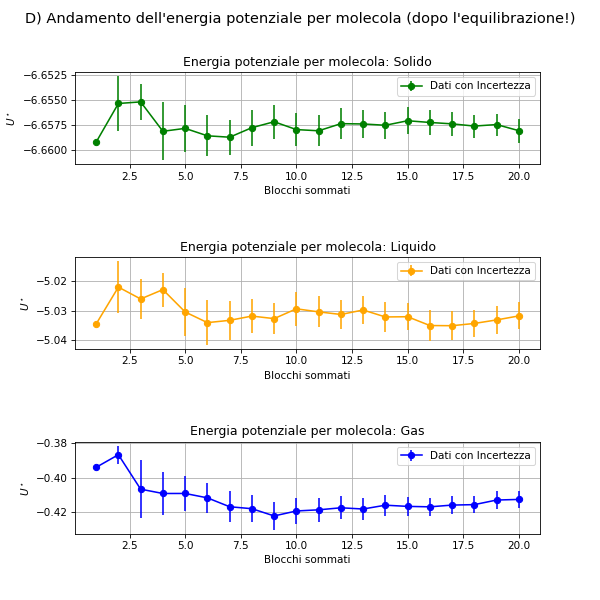

In [10]:

#così mi muovo nei grafici ed ho grafici interattivi
%matplotlib notebook 

import matplotlib.pyplot as plt
import numpy as np

# Leggi i dati dal file
data = np.loadtxt("output_epot.dat", usecols=(0,2,3))

# Crea il grafico
fig, axs = plt.subplots(3,1, sharex=False, sharey=False, figsize=(8, 8))
plt.suptitle("D) Andamento dell'energia potenziale per molecola (dopo l'equilibrazione!)", fontsize=14)

# Primo subplot
axs[0].set_title('Energia potenziale per molecola: Solido')
axs[0].errorbar(data[:20,0], data[:20,1], yerr=data[:20,2], fmt='-o', color = 'green', label='Dati con Incertezza')
axs[0].set_xlabel("Blocchi sommati")
axs[0].set_ylabel(r"$U^\star$")
#axs[0].set_ylim(0.79, 0.81)
axs[0].legend()

# Secondo subplot
axs[1].set_title('Energia potenziale per molecola: Liquido')
axs[1].errorbar(data[20:40,0], data[20:40,1], yerr=data[20:40,2], fmt='-o', color = 'orange', label='Dati con Incertezza')
axs[1].set_xlabel("Blocchi sommati")
axs[1].set_ylabel(r"$U^\star$")
#axs[1].set_ylim(1.09, 1.11)
axs[1].legend()

# Terzo subplot
axs[2].set_title('Energia potenziale per molecola: Gas')
axs[2].errorbar(data[40:60,0], data[40:60,1], yerr=data[40:60,2], fmt='-o', color = 'blue', label='Dati con Incertezza')
axs[2].set_xlabel("Blocchi sommati")
axs[2].set_ylabel(r"$U^\star$")
#axs[2].set_ylim(1.18, 1.23)
axs[2].legend()

# Aggiunge la griglia
for ax in axs:
    ax.grid(True)
    
#distanziamento
plt.subplots_adjust(wspace=0.5, hspace=1)

# Mostra il grafico
plt.show()

## <span style="color:brown"> GRAFICO E) </span> Energia cinetica per molecola

<IPython.core.display.Javascript object>


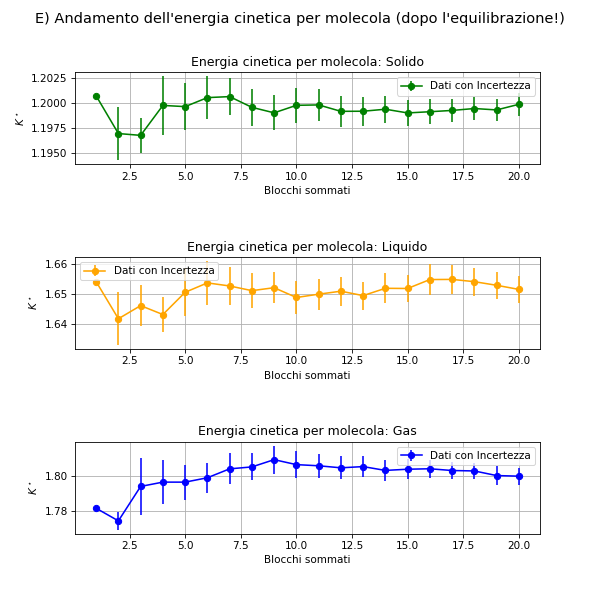

In [11]:
#così mi muovo nei grafici ed ho grafici interattivi
%matplotlib notebook 

import matplotlib.pyplot as plt
import numpy as np

# Leggi i dati dal file
data = np.loadtxt("output_ekin.dat", usecols=(0,2,3))

# Crea il grafico (tre grafici con assi scorrelati)
fig, axs = plt.subplots(3,1, sharex=False, sharey=False, figsize=(8, 8))
plt.suptitle("E) Andamento dell'energia cinetica per molecola (dopo l'equilibrazione!)", fontsize=14)

# Primo subplot
axs[0].set_title('Energia cinetica per molecola: Solido')
axs[0].errorbar(data[:20,0], data[:20,1], yerr=data[:20,2], fmt='-o', color = 'green', label='Dati con Incertezza')
axs[0].set_xlabel("Blocchi sommati")
axs[0].set_ylabel(r"$K^\star$")
#axs[0].set_ylim(0.79, 0.81)
axs[0].legend()

# Secondo subplot
axs[1].set_title('Energia cinetica per molecola: Liquido')
axs[1].errorbar(data[20:40,0], data[20:40,1], yerr=data[20:40,2], fmt='-o', color = 'orange', label='Dati con Incertezza')
axs[1].set_xlabel("Blocchi sommati")
axs[1].set_ylabel(r"$K^\star$")
#axs[1].set_ylim(1.09, 1.11)
axs[1].legend()

# Terzo subplot
axs[2].set_title('Energia cinetica per molecola: Gas')
axs[2].errorbar(data[40:60,0], data[40:60,1], yerr=data[40:60,2], fmt='-o', color = 'blue', label='Dati con Incertezza')
axs[2].set_xlabel("Blocchi sommati")
axs[2].set_ylabel(r"$K^\star$")
#axs[2].set_ylim(1.18, 1.23)
axs[2].legend()

# Aggiunge la griglia
for ax in axs:
    ax.grid(True)
    
#distanziamento
plt.subplots_adjust(wspace=0.5, hspace=1)

# Mostra il grafico
plt.show()